Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 2 </h2>
    <h1> Pingüinos de Madagascar y los pingüinos perdidos </h1>
    <p>
        Profesor Vicente Domínguez<br>
        Primer semestre 2022    
    </p>
    <br>
    <img src="https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67" width="600"/>
</center>

<br>

---

# Indicaciones

Deberás entregar SOLO el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.


## Librerías

Librerías aceptadas:
- `Numpy`
- `Pandas`
- `Matplotlib`
- `Seaborn`

Clases y funciones aceptadas de la librería `sklearn`:
- `DecisionTreeClassifier` y `plot_tree` del módulo `tree`
- `train_test_split` del módulo `model_selection`
- Funciones de los módulos `metrics` y `preprocessing`

Librerías y funciones prohibidas:
- Cualquier otra función de `sklearn`
- *Cualquier otra librería que maneje y prediga datos* 

<br>

---

# Introducción

Tu gran amigo Skipper y su equipo se encuentran en una misión super secreta para salvar a los pingüinos del malvado Dr. Espiráculo y su secuaz el Basado Vochi Doménguiz. Una vez que hayan terminado deberán reubicar los pingüinos con sus respectivas familias, es por esto que te pide a ti _-oh gran conocedor de los árboles de decisión y los ensambles-_ que implementes un programa que permita clasificar pingüinos para así reubicar a estos plumíferos en base a sus características.

<br>
<center>
<img src="https://misanimales.com/wp-content/uploads/2020/03/pinguinos-madagascar-768x549.jpg?auto=webp&quality=45&width=1920&crop=16:9,smart,safe" width="400"/>

## Descripción dataset

Para esta tarea utilizarás un dataset compuesto de información sobre pingüinos del archipiélago de Palmer. Estos datos fueron obtenidos a partir de [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_lter.csv) y después de ser preprocesados quedó la siguiente información:
- `species`: indica la especie a la que pertenece el pingüino. Este puede tomar 3 valores: Adelie Penguin (_Pygoscelis adeliae_), Chinstrap penguin (_Pygoscelis antarctica_), o Gentoo penguin (_Pygoscelis papua_).
- `culmen_length_mm`: longitud en milímetros del pico.
- `culmen_depth_mm`: profundidad en milímetros del pico.
- `flipper_length_mm`: longitud en milímetros de las aletas.
- `body_mass_g`: masa corporal en gramos.
- `island`: nombre de la isla donde se ubica. Este puede tomar 3 valores:  Dream, Torgersen, o Biscoe.
- `sex`: sexo del pingüino. Este puede tomar dos valores: _female_ o _male_. 
 
El dataset fue dividido en un set de entrenamiento y de testeo (_training_ and _testing_ sets), los cuales deberás utilizar de forma correcta a lo largo de toda tu tarea. 

# Parte 1: Preprocesamiento de los datos (0.5 ptos.)

A continuación, realiza el preprocesamiento de los datos y justifica las decisiones tomadas en el proceso.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


In [9]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv")
y_test = pd.read_csv("data/y_test.csv")


X_train.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island
0,46.9,14.6,222.0,4875.0,Female,Torgersen
1,49.8,17.3,198.0,3675.0,Female,Biscoe
2,46.6,17.8,193.0,3800.0,Female,Biscoe
3,53.4,15.8,219.0,5500.0,Male,Torgersen
4,46.7,17.9,195.0,3300.0,Female,Biscoe


In [6]:
y_train.head(5)

,species
0,Gentoo penguin (Pygoscelis papua)
1,Chinstrap penguin (Pygoscelis antarctica)
2,Chinstrap penguin (Pygoscelis antarctica)
3,Gentoo penguin (Pygoscelis papua)
4,Chinstrap penguin (Pygoscelis antarctica)


In [ ]:
# to do:
# tratar outliers
# eliminar datos corruptos
# Crear los bins para cada valor continuo y cambiarlos
# pasar a enteros los valores categoricos

# hacer esto para los 4 datasets
# recordar que los bins son iguales para todso




<AxesSubplot:xlabel='body_mass_g'>

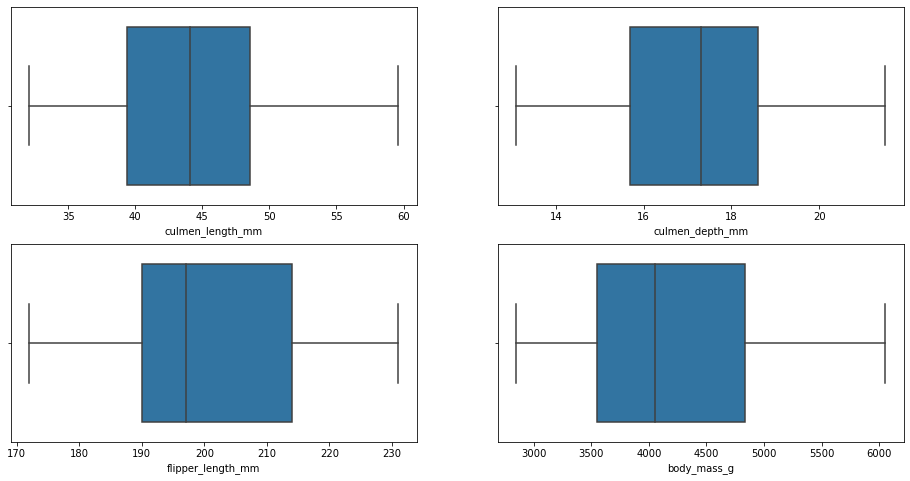

In [20]:
# Graficamos las columnas con datos continuos para revisar si es que se encuentran outliers a simple vista
# Al parecer, no hay outliers visibles 

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(X_train['culmen_length_mm'])
plt.subplot(2,2,2)
sns.boxplot(X_train['culmen_depth_mm'])
plt.subplot(2,2,3)
sns.boxplot(X_train['flipper_length_mm'])
plt.subplot(2,2,4)
sns.boxplot(X_train['body_mass_g'])


In [27]:
# aqui fui revisando los valores minimos y maximos para estar seguro de los outliers en el set de entrenamiento

X_train.sort_values(by=['body_mass_g'])
X_train.sort_values(by=['culmen_length_mm'])
X_train.sort_values(by=['culmen_depth_mm'])
X_train.sort_values(by=['flipper_length_mm'])

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island
10,37.9,18.6,172.0,3150.0,Female,Torgersen
216,37.8,18.3,174.0,3400.0,Female,Torgersen
89,46.1,18.2,178.0,3250.0,Female,Biscoe
76,37.2,18.1,178.0,3900.0,Male,Biscoe
15,33.1,16.1,178.0,2900.0,Female,Biscoe
...,...,...,...,...,...,...
60,59.6,17.0,230.0,6050.0,Male,Torgersen
143,50.0,16.3,230.0,5700.0,Male,Torgersen
152,55.1,16.0,230.0,5850.0,Male,Torgersen
221,48.6,16.0,230.0,5800.0,Male,Torgersen


In [28]:
# revisamos la existencia de valores Nan a través de todo el dataframe
X_train.isna().sum().sum()

0

In [29]:
y_train.isna().sum().sum()

0

In [31]:
X_test.isna().sum().sum()

0

In [32]:
y_test.isna().sum().sum()

0

In [39]:
# ahora que sabemos que los datos se encuentran libres de valors nulos y outliers pasamos a 
# enteros los valores categoricos de la muestra.


# elegimos las columnas categoricas
categ = ['sex','island']

# codificamos con LabelEncoder de sklearn
le = preprocessing.LabelEncoder()
X_train[categ] = X_train[categ].apply(le.fit_transform)
X_test[categ] = X_test[categ].apply(le.fit_transform)

# ahora codificamos la variable dependiente
categ_depend = ['species']
le_depend = preprocessing.LabelEncoder()
y_train[categ_depend] = y_train[categ_depend].apply(le_depend.fit_transform)
y_test[categ_depend] = y_test[categ_depend].apply(le_depend.fit_transform)

y_test.head()


,species
0,2
1,1
2,2
3,2
4,2


# Parte 2: Árboles de decisión (1.5 ptos.)



Lo primero que debes realizar es implementar un árbol de decisión que permita clasificar los distintos tipos de pingüinos (`y`) en base a un set datos (`X`). 
 
Para esto deberás implementar una clase que tenga los métodos `fit` y `predict`:
- El método `fit` recibe un set `X` e `y`, donde `X` corresponde a un DataFrame e `y` es una serie con la clasificación de cada pingüino. A partir de estos datos, genera y almacena un árbol de decisión.
- El método `predict` solo recibe un set `X` (del mismo número de dimensiones que el usado para `fit`) y utiliza el árbol generado anteriormente para predecir la clase de cada dato de `X`.

El árbol implementado en esta primera parte **NO** debe presentar limitaciones en cuanto a la cantidad de niveles de profundidad que tenga.

In [60]:
class decisionTree:
    def __init__(self, depth=None):
        self.tree = DecisionTreeClassifier(random_state=69, max_depth=depth)
        
    def fit(self, X, y):
        self.tree.fit(X, y)
        
    def predict(self, X_toPredict, y_true):
        prediction = self.tree.predict(X_toPredict)
        accuracy = metrics.accuracy_score(y_true, prediction)
        print(accuracy)
        return accuracy

In [66]:
tree = decisionTree()
tree.fit(X_train, y_train)
tree.predict(X_test, y_test)


0.99


0.99

Ahora, implementa un nuevo árbol de decisión (con los mismos métodos `fit` y `predict`), pero limita este árbol para que solo tenga **3 niveles de profundidad.** 

In [67]:
tree_threeLevels = decisionTree(depth=3)
tree_threeLevels.fit(X_train, y_train)
tree_threeLevels.predict(X_test, y_test)


0.98


0.98

A partir de la implementación de ambos árboles de decisión, responde la siguiente pregunta:
> ¿Cuál de los árboles de decisión generó mejores resultados? <br> Justifique su respuesta en base a los resultados del _testing set_ y el uso de métricas de evaluación.  


El arbol sin limite de niveles de profundidad obtuvo mejores resultados, si bien no fue mucha la diferencia, obtuvo entre un 0.1% y 1.9% de mayor precision segun las metricas de sklearn.accuarcy.

# Parte 3: Random Forest (4 ptos.)

A continuación deberas implementar un _Random Forest_ compuesto por 3 árboles de decisión.
 
Para ello deberás crear la clase `RandomForest` que deberá contener los métodos `fit`, `calculate_oob` y `predict`:
- El método `fit` recibe un set `X` e `y`, donde `X` corresponde a un DataFrame e `y` es una serie con la clasificación de cada pingüino. A partir de estos datos, la función genera y almacena los árboles de decisión asociados al _random forest_.
Al momento de generar cada árbol de decisión, deberás realizar lo siguiente:
    1. Obtener un _sample_ aleatorio de 5 de las _features_ que componen `X`.
    2. Separa los datos contenidos en `X` e `y` en un set de entrenamiento y otro de testeo.
    3. Entrenar el árbol de decisión, en base al set de entrenamiento obtenido en el paso anterior.
    4. Almacenar el árbol generado.
- El método `calculate_oob`, calcula el _Out-of-bag error_ del Random Forest. 
- El método `predict` recibe un set `X` (del mismo número de dimensiones que el usado para `fit`) y a partir de los árboles de decisión generados predice la clase a la que pertenece de cada dato de `X`.


A partir de la implementación del _Random Forest_, responde las siguientes preguntas:
> 1. ¿Cuál fue el _Out-of-bag error_ obtenido? ¿Qué se puede hacer para mejorar este valor?

> 2. Comparando con los resultados, ¿qué método dio mejores resultados?  <br> Justifique su respuesta en base a los resultados del _testing set_ y el uso de métricas de evaluación.  


# Bonus

Esta tarea cuenta con una serie de bonus a los que podrás optar. Cabe recalcar que para optar a estos beneficios la nota de tu tarea (sin bonus) debe ser **igual o superior a 3,95** (sin considerar posibles descuentos).

## Meme (1-2 décimas)

Haga un meme relacionado a la material del curso. Si es bueno, podrá optar a décimas extra. 

## Random Forest Parámetrizado (3 décimas)

A partir del código implementado anteriormente, genere una nueva clase que permita un _Random Forest_ donde los siguientes valores sean **variables de instancia** de clase y, que a su vez, permitan modificar el comportamiento del algoritmo:
- `tree_numbers`: int que indica la cantidad de árboles por la que estará compuesto el Random Forest.
- `n_features`: int que indica la cantidad de _features_ a considerar para generar el _sample_ de cada árbol de decisión.
- `criterion`: string que indica la función a utilizar para medir la calidad de un _split_.
- `max_depth`: int que indica la profundidad máxima de los árboles.
- `min_sample_split`: int o float que indica la cantidad mínima de _samples_ requeridos para dividir un nodo de los árboles. 
- `max_features`: int, float o string que indica la cantidad de _features_ a considerar al momento de generar el árbol. 
 
A excepción de `tree_numbers` y `n_features` todas estas variables deben ser opcionales, por lo que queda a tu criterio los valores por defecto a utilizar en cada caso. <br><br>

Para obtener este beneficio, el bonus debe estar implementado en su totalidad, ya que no se entregará puntaje intermedio. 